In [215]:
minus = 0b0
plus = 0b1

def encode_dm(source, scale, threshold):
    stream = []
    L = (len(source) + scale - 1) // scale
    cur = 0
    for i in range(L - 1):
        dif = source[(i + 1) * scale] - cur
        if dif >= 0:
            stream.append(plus)
            cur += threshold
        else:
            stream.append(minus)
            cur -= threshold
    return bytes(stream)

/var/folders/4v/n_tcbvb52f5fls_l8v4twbb40000gn/T/ipykernel_82103/2544927709.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = data.astype(np.float)


finished 0
finished 100
finished 200
finished 300
finished 400
finished 500
finished 600
690
700
finished 700
710
finished 800
finished 900
finished 1000
finished 1100
finished 1200
finished 1300
finished 1400
finished 1500
finished 1600
finished 1700
finished 1800
finished 1900
finished 2000
finished 2100
finished 2200
finished 2300
finished 2400
finished 2500
finished 2600
finished 2700
finished 2800
finished 2900


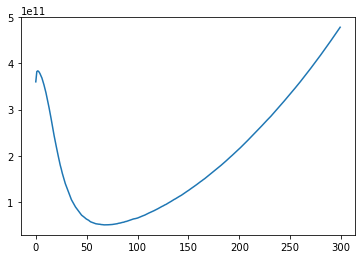

In [221]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile

wf = "atr503_a50.wav"
fs, data = wavfile.read("../data/wav/{}".format(wf))
data = data.astype(np.float)


SR = 16000
scale = fs // SR

error = []
for d in range(0, 3000, 10):
    stream = encode_dm(source = data, scale = scale, threshold = d)
    y = [0]
    for bit in stream:
        val = y[-1]
        if bit == minus:
            val -= d
        elif bit == plus:
            val += d
        else:
            print("HA?")
        for _ in range(scale):
            y.append(val)
    res = 0
    for i in range(len(y)):
        res += (y[i] - data[i]) ** 2
    error.append(res)
    if(len(error) >= 5 and (error[-1] - error[-2]) * (error[-2] - error[-3]) < 0):
        print(d)
    if d % 100 == 0:
        print('finished {}'.format(d))

plt.plot(error)

In [222]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
import os

wf = "atr503_a50.wav"
fs, data = wavfile.read("../data/wav/{}".format(wf))
data = data.astype(np.float)

SR = 16000
scale = fs // SR

def func(source, scale, threshold):
    stream = encode_dm(source, scale, threshold)
    y = [0]
    for bit in stream:
        val = y[-1]
        if bit == minus:
            val -= threshold
        elif bit == plus:
            val += threshold
        else:
            print("HA?")
        for _ in range(scale):
            y.append(val)
    res = 0
    for i in range(len(y)):
        res += (y[i] - source[i]) ** 2
    return res

left = 100
right = 3000
delta = 10

while right - left > 10:
    mid = (left + right) // 2
    res = func(data, scale, mid + delta) - func(data, scale, mid)
    if res > 0:
        right = mid
    else:
        left = mid
    
print(right)

/var/folders/4v/n_tcbvb52f5fls_l8v4twbb40000gn/T/ipykernel_82103/1196833162.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = data.astype(np.float)


693


/var/folders/4v/n_tcbvb52f5fls_l8v4twbb40000gn/T/ipykernel_82103/2988302712.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = data.astype(np.float)


(72000.0, 72100.0)

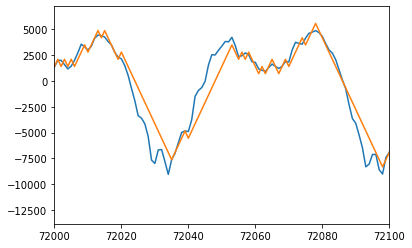

In [248]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
import os

wf = "atr503_a50.wav"
fs, data = wavfile.read("../data/wav/{}".format(wf))
data = data.astype(np.float)

plt.plot(data)

SR = 16000
threshold = 693
scale = fs // SR
stream = encode_dm(source = data, scale = scale, threshold = threshold)

y = [0]
d = threshold
for bit in stream:
    val = y[-1]
    if bit == minus:
        val -= d
    elif bit == plus:
        val += d
    else:
        print("HA?")
    for _ in range(scale):
        y.append(val)

plt.plot(y)
plt.xlim(72000, 72100)
#plt.ylim(-8000, 8000)